## Solution for Task 6
We updated the code to implement an evolution instead of simple backpropagation

/tmp/ipykernel_105239/693729338.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("../data", delim_whitespace=True, header=None, names=column_names)


Data Loaded Successfully.
   index  class         x         y
0      0      0  0.209445  0.402181
1      1      0  0.002314  0.310338
2      2      0  0.430949  0.404158
3      3      0  0.188847  0.601660
4      4      0  0.056400 -0.119224


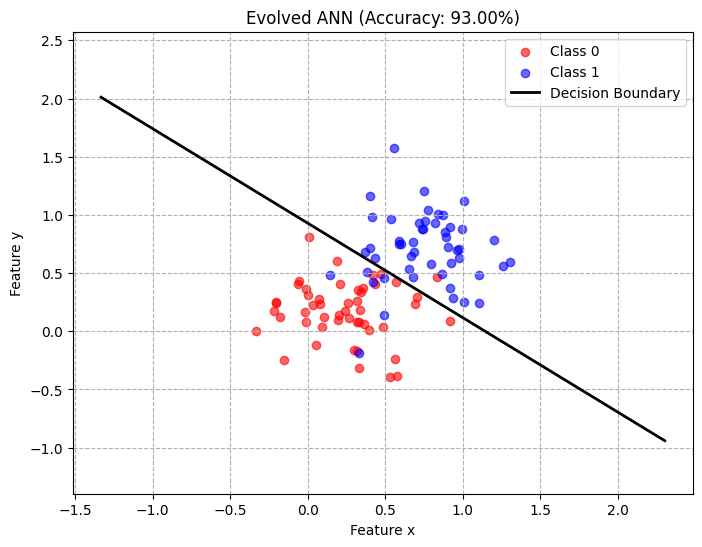

Final Weights: w0=-3.3763, w1=2.9524, w2=3.6332


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
column_names = ["index", "class", "x", "y"]
data = pd.read_csv("../data", delim_whitespace=True, header=None, names=column_names)

X = data[["x", "y"]].values
y = data["class"].values

print("Data Loaded Successfully.")
print(data.head())

POPULATION_SIZE = 100
GENERATIONS = 300
MUTATION_STD = 0.2
ELITE_SIZE = 5

def initialize_population():
    return np.random.uniform(-5.0, 5.0, size=(POPULATION_SIZE, 3))

def mutate(weights):
    return weights + np.random.normal(0.0, MUTATION_STD, size=weights.shape)

def classification_accuracy(weights, X, y_true):
    correct = 0
    # Net input calculation
    z = weights[0] + X[:, 0] * weights[1] + X[:, 1] * weights[2]
    # Prediction: phi > 0 -> Class 1, else Class 0
    predictions = np.where(z > 0, 1, 0)
    return np.mean(predictions == y_true)

def evolve():
    population = initialize_population()
    best_weights = None
    best_fitness = -np.inf

    for generation in range(GENERATIONS):
        fitnesses = np.array([classification_accuracy(ind, X, y) for ind in population])

        if np.max(fitnesses) > best_fitness:
            best_fitness = np.max(fitnesses)
            best_weights = population[np.argmax(fitnesses)].copy()

        # Selection & Reproduction
        elite_indices = np.argsort(fitnesses)[-ELITE_SIZE:]
        elites = population[elite_indices]

        new_population = list(elites)
        while len(new_population) < POPULATION_SIZE:
            parent = elites[np.random.randint(ELITE_SIZE)]
            new_population.append(mutate(parent))

        population = np.array(new_population)

    return best_weights, best_fitness

best_weights, best_fitness = evolve()

# ------------------------------------------------------------
# Plotting (Corrected Logic)
# ------------------------------------------------------------
w0, w1, w2 = best_weights
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 200)

# CORRECTED FORMULA: y = -(w1/w2)x - (w0/w2)
y_vals = -(w1 / w2) * x_vals - (w0 / w2)

plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 0", alpha=0.6, color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1", alpha=0.6, color='blue')
plt.plot(x_vals, y_vals, color="black", linewidth=2, label="Decision Boundary")

plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.title(f"Evolved ANN (Accuracy: {best_fitness:.2%})")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

print(f"Final Weights: w0={w0:.4f}, w1={w1:.4f}, w2={w2:.4f}")

# Old code
Below is the old code which used simple backpropagation

/tmp/ipykernel_224334/4266331724.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("data", delim_whitespace=True, header=None, names=column_names)


Epoch    0, Avg Error 0.714429, Accuracy 0.500
Epoch  200, Avg Error 0.132103, Accuracy 0.930
Epoch  400, Avg Error 0.131452, Accuracy 0.930
Epoch  600, Avg Error 0.131207, Accuracy 0.930
Epoch  800, Avg Error 0.131085, Accuracy 0.930

--- Training Complete ---
Final weights for this ANN: [-4.67838906  3.96495202  5.58183523]


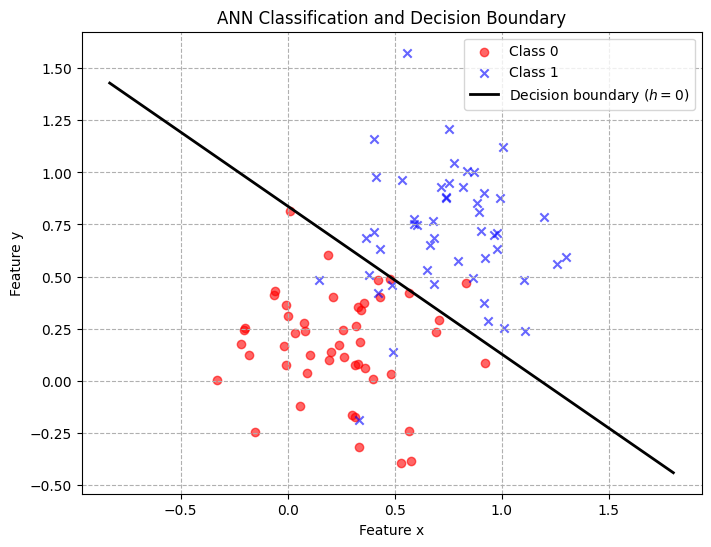

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


column_names = ["index", "class", "x", "y"]
data = pd.read_csv("../data", delim_whitespace=True, header=None, names=column_names)


# Separate features and labels
X = data[["x", "y"]].values
y = data["class"].values

#  ANN

# Activation function
def activation(z):
    return 2.0 / (1.0 + np.exp(-2.0 * z)) - 1.0

# Derivative of activation function for backpropagation
def activation_derivative(z):
    o = activation(z)
    return 1.0 - o**2

# Forward pass
def forward(weights, x):
    w0, w1, w2 = weights
    z = w0 + w1 * x[0] + w2 * x[1]
    return z, activation(z)

# Fitness (Classification Accuracy)
def classification_accuracy(weights, X, y_true):
    correct = 0
    for x, label in zip(X, y_true):
        _, output = forward(weights, x)
        prediction = 1 if output > 0 else 0
        if prediction == label:
            correct += 1
    return correct / len(y_true)

# Training

# Initialize weights randomly
weights = np.random.uniform(-1.0, 1.0, size=3)

# Learning parameters
lr = 0.05
epochs = 1000

for epoch in range(epochs):
    delta_w = np.zeros_like(weights)
    total_error = 0.0

    for x, target in zip(X, y):
        target_mapped = 2.0 * target - 1.0

        net, o = forward(weights, x)

        # Squared error
        total_error += 0.5 * (o - target_mapped) ** 2

        factor = (o - target_mapped) * activation_derivative(net)

        # Weight updates
        delta_w[0] += -lr * factor * 1.0
        delta_w[1] += -lr * factor * x[0]
        delta_w[2] += -lr * factor * x[1]

    # Apply update to weights
    weights += delta_w

    if epoch % 200 == 0:
        acc = classification_accuracy(weights, X, y)
        print(f"Epoch {epoch:4d}, Avg Error {total_error/len(X):.6f}, Accuracy {acc:.3f}")

print("\n--- Training Complete ---")
print(f"Final weights for this ANN: {weights}")

# Plot data points
plt.figure(figsize=(8, 6))

class_0 = data[data["class"] == 0]
class_1 = data[data["class"] == 1]

plt.scatter(class_0["x"], class_0["y"], label="Class 0", marker='o', color='red', alpha=0.6)
plt.scatter(class_1["x"], class_1["y"], label="Class 1", marker='x', color='blue', alpha=0.6)

# Plot decision boundary
w0, w1, w2 = weights

if np.isclose(w2, 0):
    if not np.isclose(w1, 0):
        x_intercept = -w0 / w1
        plt.axvline(x=x_intercept, color='k', linestyle='-', linewidth=2, label='Decision Boundary ($h=0$)')
    else:
        print("Warning: Both w1 and w2 are near zero. Boundary is undefined/trivial.")
else:
    x_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200)
    y_vals = (-w1 / w2) * x_vals - (w0 / w2)

    plt.plot(x_vals, y_vals, color='k', linestyle='-', linewidth=2, label="Decision boundary ($h=0$)")

plt.title("ANN Classification and Decision Boundary")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

------ First version -------

old!

a) load data

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
column_names = ["index", "class", "x", "y"]
data = pd.read_csv("../data", delim_whitespace=True, header=None, names=column_names)

# Separate features and labels
X = data[["x", "y"]].values
y = data["class"].values

# Inspect the first few rows
data.head()


/tmp/ipykernel_224334/3862763450.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("data", delim_whitespace=True, header=None, names=column_names)


,index,class,x,y
0,0,0,0.209445,0.402181
1,1,0,0.002314,0.310338
2,2,0,0.430949,0.404158
3,3,0,0.188847,0.601660
4,4,0,0.056400,-0.119224


b) simple ANN

In [2]:
import numpy as np

# Activation function
def activation(z):
    return 2.0 / (1.0 + np.exp(-2.0 * z)) - 1.0

# Derivative of activation function
def activation_derivative(z):
    o = activation(z)
    return 1.0 - o**2

# Forward pass
def forward(weights, x):
    """
    weights: [w0, w1, w2]
    x: input vector [x1, x2]
    """
    w0, w1, w2 = weights
    z = w0 + w1 * x[0] + w2 * x[1]
    return z, activation(z)

# Fitness
def classification_accuracy(weights, X, y_true):
    correct = 0
    for x, label in zip(X, y_true):
        _, output = forward(weights, x)
        prediction = 1 if output > 0 else 0
        if prediction == label:
            correct += 1
    return correct / len(y_true)


c) evolution

In [6]:
# Initialize weights randomly
weights = np.random.uniform(-1.0, 1.0, size=3)

# Learning parameters
eta = 0.1
epochs = 2000

for epoch in range(epochs):
    delta_w = np.zeros_like(weights)
    total_error = 0.0

    for x, target in zip(X, y):
        net, o = forward(weights, x)

        # Squared error
        total_error += (o - target) ** 2

        # Backpropagation factor
        factor = 2.0 * (o - target) * (1.0 - o**2)

        # Weight updates
        delta_w[0] += -eta * factor * 1.0   # bias
        delta_w[1] += -eta * factor * x[0]
        delta_w[2] += -eta * factor * x[1]

    # Apply averaged update
    weights += delta_w / len(X)

    # Monitoring
    if epoch % 500 == 0:
        acc = classification_accuracy(weights, X, y)
        print(f"Epoch {epoch}, Error {total_error:.4f}, Accuracy {acc:.3f}")


Epoch 0, Error 215.2558, Accuracy 0.500
Epoch 500, Error 9.5670, Accuracy 0.630
Epoch 1000, Error 9.5667, Accuracy 0.630
Epoch 1500, Error 9.5667, Accuracy 0.630


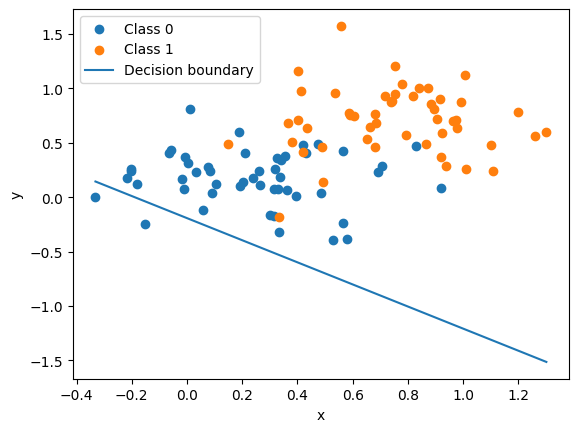

weights for this ANN: [-0.16476512  0.86759849  0.85389324]


In [7]:
import matplotlib.pyplot as plt

# Plot data points
plt.figure()

class_0 = data[data["class"] == 0]
class_1 = data[data["class"] == 1]

plt.scatter(class_0["x"], class_0["y"], label="Class 0")
plt.scatter(class_1["x"], class_1["y"], label="Class 1")

# Plot decision boundary
w0, w1, w2 = weights
x_vals = np.linspace(data["x"].min(), data["x"].max(), 200)
y_vals = (w0 / w2) - (w1 / w2) * x_vals

plt.plot(x_vals, y_vals, label="Decision boundary")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"weights for this ANN: {weights}")